## Example intial data exploration and data quality check

In [ ]:
await piplite.install('ipyleaflet')

In [31]:
import pandas as pd              # This imports functionality for working with data tables
import pathlib                   # Mainly used to navigate the folder structure on your computer

from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, MarkerCluster

### Context

Our team been commissioned to identify and quantify the factors that lead to more positive outcomes after a crime has been reported in the City of London. Here, we have been tasked with running a data quality audit to see if the data is suitable for our team's task. 

For this proof-of-concept we are just going to use the public data from July 2019 sourced from [data.police.uk](https://data.police.uk/data/). Using this smaller dataset allows us to quickly look closely at the data while still identifying potential data quality issues. 

Our six dimensions of data quality are:
- Valid 
- Unique
- Complete
- Timely
- Accurate
- Consistent

We can already say the data is out of date, so not **timely**, as the data reporting methods might have changed since 2019.

### Import the data

In [2]:
notebook_folder = pathlib.Path.cwd() 
data_folder = notebook_folder / 'data'
data_folder

WindowsPath('C:/Users/DominicHunt/OneDrive - Corndel Ltd/CCL/Module 1/Week 3/Police data/data')

In [3]:
outcomes_data = pd.read_csv(data_folder / '2019-07-city-of-london-outcomes.csv')

In [4]:
street_data = pd.read_csv(data_folder / '2019-07-city-of-london-street.csv')

### Check what data we have
Is it valid? Is it complete?

In [5]:
outcomes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crime ID      649 non-null    object 
 1   Month         649 non-null    object 
 2   Reported by   649 non-null    object 
 3   Falls within  649 non-null    object 
 4   Longitude     616 non-null    float64
 5   Latitude      616 non-null    float64
 6   Location      649 non-null    object 
 7   LSOA code     616 non-null    object 
 8   LSOA name     616 non-null    object 
 9   Outcome type  649 non-null    object 
dtypes: float64(2), object(8)
memory usage: 50.8+ KB


In [6]:
outcomes_data.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,d916bdd10349bec542af76fca46dba9cd0bea4a0c522ef...,2019-07,City of London Police,City of London Police,-0.080478,51.527164,On or near Nightclub,E01033708,Hackney 027G,Suspect charged
1,7c09a5d829ed8e8a8471d5226a7f7d05b60c86db329182...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning
2,7bcf63778a38f648ea025036ba2688a13891d276776acd...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged
3,c8c87a0bc67dffb3a8fd1b73b909d5ea3e59f1984a5c34...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
4,db2af2273cebcbd38278fcd8972a35340d22d3d7a482bc...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


### Unique crime ID's?
Is the data valid? Is it unique?

In [8]:
len(outcomes_data['Crime ID'].unique())

640

Are the duplicates consistent?

In [9]:
outcomes_data[outcomes_data.duplicated('Crime ID', keep=False)].sort_values('Crime ID')

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
65,0a3764a348c726e247dab6cf2496d7a8f6e9c693fc873b...,2019-07,City of London Police,City of London Police,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Suspect charged
66,0a3764a348c726e247dab6cf2496d7a8f6e9c693fc873b...,2019-07,City of London Police,City of London Police,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Suspect charged
26,3868530a9b13902da68f52b661a39ef954b35108075f12...,2019-07,City of London Police,City of London Police,-0.083296,51.517058,On or near OLD BROAD STREET,E01032739,City of London 001F,Suspect charged
27,3868530a9b13902da68f52b661a39ef954b35108075f12...,2019-07,City of London Police,City of London Police,-0.083296,51.517058,On or near OLD BROAD STREET,E01032739,City of London 001F,Suspect charged
56,7d900e9f31ec2167b26d284004b78474d8ee5e0949680b...,2019-07,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Suspect charged
57,7d900e9f31ec2167b26d284004b78474d8ee5e0949680b...,2019-07,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Suspect charged
18,96dc0e4b0a0548db1a9ce5e423563cb014c7102aa27d0e...,2019-07,City of London Police,City of London Police,-0.090506,51.513524,On or near POULTRY,E01032739,City of London 001F,Suspect charged
19,96dc0e4b0a0548db1a9ce5e423563cb014c7102aa27d0e...,2019-07,City of London Police,City of London Police,-0.090506,51.513524,On or near POULTRY,E01032739,City of London 001F,Suspect charged
47,c3e94ba0bdceb17376616a3272096c10e6e834e7aa5e40...,2019-07,City of London Police,City of London Police,-0.076031,51.509547,On or near TOWER HILL,E01004293,Tower Hamlets 027B,Suspect charged
48,c3e94ba0bdceb17376616a3272096c10e6e834e7aa5e40...,2019-07,City of London Police,City of London Police,-0.076031,51.509547,On or near TOWER HILL,E01004293,Tower Hamlets 027B,Suspect charged


In [10]:
outcomes_unique = outcomes_data[~outcomes_data.duplicated('Crime ID', keep='first')]
outcomes_unique.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,d916bdd10349bec542af76fca46dba9cd0bea4a0c522ef...,2019-07,City of London Police,City of London Police,-0.080478,51.527164,On or near Nightclub,E01033708,Hackney 027G,Suspect charged
1,7c09a5d829ed8e8a8471d5226a7f7d05b60c86db329182...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning
2,7bcf63778a38f648ea025036ba2688a13891d276776acd...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged
3,c8c87a0bc67dffb3a8fd1b73b909d5ea3e59f1984a5c34...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
4,db2af2273cebcbd38278fcd8972a35340d22d3d7a482bc...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


### Location validity
Is the data valid?

In [11]:
outcomes_located = outcomes_unique[~outcomes_unique['Longitude'].isnull()]

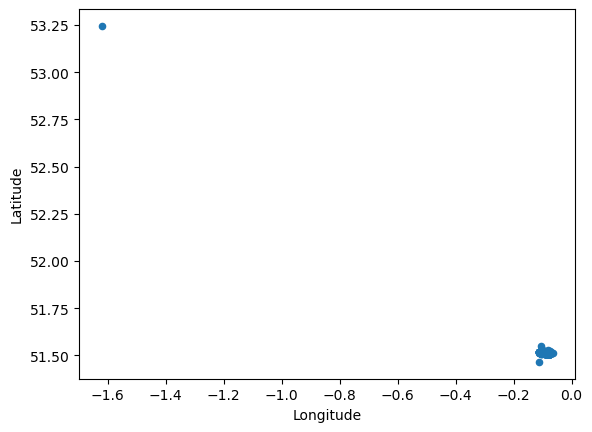

In [12]:
outcomes_located.plot.scatter('Longitude', 'Latitude');

In [13]:
outcomes_located[outcomes_located['Longitude'] < -1]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
414,f2f4e98933d44c23a63b983de32ef18f28de112cf5846b...,2019-07,City of London Police,City of London Police,-1.621245,53.245553,On or near Sports/Recreation Area,E01019606,Derbyshire Dales 002C,Investigation complete; no suspect identified


In [14]:
london_located = outcomes_located[outcomes_located['Longitude'] > -1]

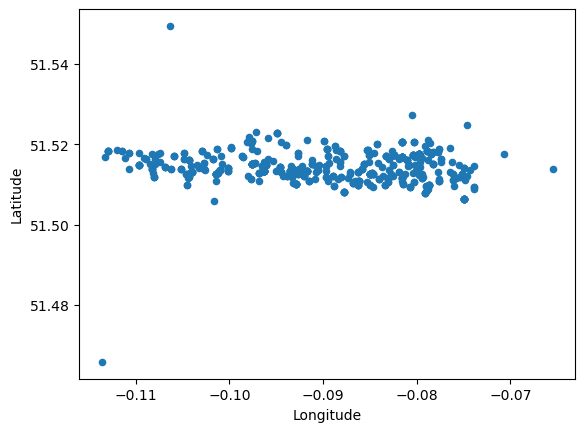

In [15]:
london_located.plot.scatter('Longitude', 'Latitude');

In [16]:
london_located[london_located['Latitude'] < 51.49]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
602,48181ac92e1d6914bce16aff37bd4ce25da4f7c765fb22...,2019-07,City of London Police,City of London Police,-0.113649,51.46578,On or near BRIXTON ROAD,E01003047,Lambeth 011B,Investigation complete; no suspect identified


In [17]:
london_located_north = london_located[london_located['Latitude'] > 51.49]

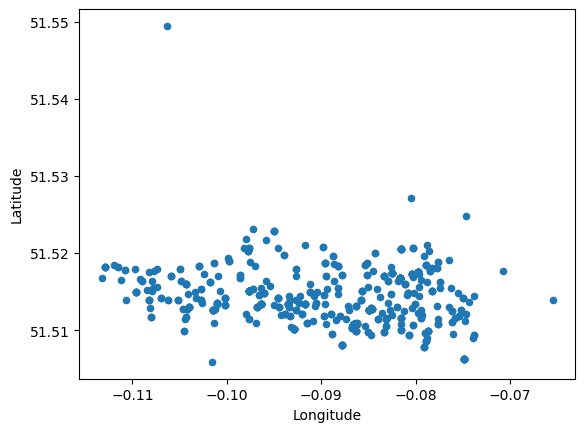

In [18]:
london_located_north.plot.scatter('Longitude', 'Latitude');

In [19]:
london_located_north[london_located_north['Latitude'] > 51.525]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,d916bdd10349bec542af76fca46dba9cd0bea4a0c522ef...,2019-07,City of London Police,City of London Police,-0.080478,51.527164,On or near Nightclub,E01033708,Hackney 027G,Suspect charged
294,6efa9288974495c41df0232fafe7f605ca9bb74222d1e2...,2019-07,City of London Police,City of London Police,-0.106353,51.549464,On or near FIELDWAY CRESCENT,E01002739,Islington 013A,Unable to prosecute suspect


In [20]:
london_located_central = london_located_north[london_located_north['Latitude'] < 51.525]

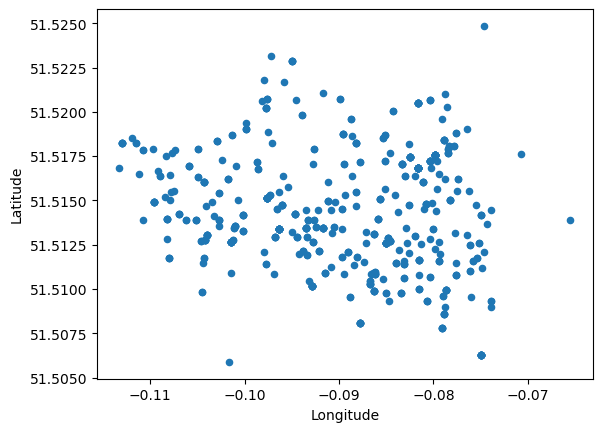

In [21]:
london_located_central.plot.scatter('Longitude', 'Latitude');

### Export and explore data

In [52]:
london_located_central.to_csv(data_folder / '2019-07-city-of-london-outcomes_cleaned.csv')

In [51]:
map_center = (london_located_central[['Latitude', 'Longitude']].max() + london_located_central[['Latitude', 'Longitude']].min())/2
map_center_list = map_center.to_list()

m = Map(
    basemap=basemap_to_tiles(basemaps.OpenStreetMap.Mapnik),
    center=map_center_list,
    zoom=13
    )

marker_list = [Marker(location=tuple(l), draggable=False) for l in london_located_central[['Latitude', 'Longitude']].values]
marker_cluster = MarkerCluster(markers=marker_list)
m.add_layer(marker_cluster);

m

Map(center=[51.515364500000004, -0.08937049999999999], controls=(ZoomControl(options=['position', 'zoom_in_tex…